<a href="https://colab.research.google.com/github/arrohit258/MBTI/blob/main/MBTI_Personality_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [43]:
error_bad_lines=False
df=pd.read_csv("/content/mbti_1.csv",engine='python',error_bad_lines=False)
#df = pd.read_csv("/content/mbti_1.csv",engine='python',sep='\t',encoding='utf-8', error_bad_lines=False,quoting=csv.QUOTE_NONE)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py1
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
IE=[]
NS=[]
TF=[]
PJ=[]
for i in range(len(df)):
  IE.append(int(df['type'][i][0]=='E'))
  NS.append(int(df['type'][i][1]=='S'))
  TF.append(int(df['type'][i][2]=='F'))
  PJ.append(int(df['type'][i][3]=='J'))
df['IE']=IE
df['NS']=NS
df['TF']=TF
df['PJ']=PJ
df

,type,posts,IE,NS,TF,PJ
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,1,1
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,0,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,0,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,0,1
4,ENTJ,'You're fired.|||That's another silly misconce...,1,0,0,1
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,0,1,1,0
8671,ENFP,'So...if this thread already exists someplace ...,1,0,1,0
8672,INTP,'So many questions when i do these things. I ...,0,0,0,0
8673,INFP,'I am very conflicted right now when it comes ...,0,0,1,0


In [46]:

stopwords = STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [47]:
def preprocess(data):
    doc = nlp(data, disable = ['ner', 'parser'])
    lemmas = [token.lemma_ for token in doc]
    #remove stopwords 
    lemm = [lemma for lemma in lemmas
              if lemma.isalpha() and lemma not in stopwords ]
    return ' ' .join(lemm)
df['posts']=df['posts'].apply(preprocess)
df

,type,posts,IE,NS,TF,PJ
0,INFJ,intj moment sportscenter play life change expe...,0,0,1,1
1,ENTP,I find lack I post boring position example I g...,1,0,0,0
2,INTP,good course I I know blessing absolutely posit...,0,0,0,0
3,INTJ,Dear INTP I enjoy conversation day Esoteric ga...,0,0,0,1
4,ENTJ,silly misconception approach logically key unl...,1,0,0,1
...,...,...,...,...,...,...
8670,ISFP,I think cat Fi dom reason website haven neo na...,0,1,1,0
8671,ENFP,thread exist someplace heck I delete I guess I...,1,0,1,0
8672,INTP,question I thing I purple pill pick win lotter...,0,0,0,0
8673,INFP,I conflicted right come want child I honestly ...,0,0,1,0


In [48]:
df

,type,posts,IE,NS,TF,PJ
0,INFJ,intj moment sportscenter play life change expe...,0,0,1,1
1,ENTP,I find lack I post boring position example I g...,1,0,0,0
2,INTP,good course I I know blessing absolutely posit...,0,0,0,0
3,INTJ,Dear INTP I enjoy conversation day Esoteric ga...,0,0,0,1
4,ENTJ,silly misconception approach logically key unl...,1,0,0,1
...,...,...,...,...,...,...
8670,ISFP,I think cat Fi dom reason website haven neo na...,0,1,1,0
8671,ENFP,thread exist someplace heck I delete I guess I...,1,0,1,0
8672,INTP,question I thing I purple pill pick win lotter...,0,0,0,0
8673,INFP,I conflicted right come want child I honestly ...,0,0,1,0


In [49]:
#encoding=> I=0,N=0,T=0,P=0
IE=[]
NS=[]
TF=[]
PJ=[]
for i in range(len(df)):
  IE.append(int(df['type'][i][0]=='E'))
  NS.append(int(df['type'][i][1]=='S'))
  TF.append(int(df['type'][i][2]=='F'))
  PJ.append(int(df['type'][i][3]=='J'))
df['IE']=IE
df['NS']=NS
df['TF']=TF
df['PJ']=PJ
df

,type,posts,IE,NS,TF,PJ
0,INFJ,intj moment sportscenter play life change expe...,0,0,1,1
1,ENTP,I find lack I post boring position example I g...,1,0,0,0
2,INTP,good course I I know blessing absolutely posit...,0,0,0,0
3,INTJ,Dear INTP I enjoy conversation day Esoteric ga...,0,0,0,1
4,ENTJ,silly misconception approach logically key unl...,1,0,0,1
...,...,...,...,...,...,...
8670,ISFP,I think cat Fi dom reason website haven neo na...,0,1,1,0
8671,ENFP,thread exist someplace heck I delete I guess I...,1,0,1,0
8672,INTP,question I thing I purple pill pick win lotter...,0,0,0,0
8673,INFP,I conflicted right come want child I honestly ...,0,0,1,0


In [50]:
#understanding the data

#print(df['type'])
type_count=df.groupby('type').count()
print(type_count['posts'])
graph_data=pd.DataFrame(data=type_count['posts'])
print(type(graph_data))
#print(df['type'].count['INFP'])
#type_count1=count1(type_count)

type
ENFJ     190
ENFP     675
ENTJ     231
ENTP     685
ESFJ      42
ESFP      48
ESTJ      39
ESTP      89
INFJ    1470
INFP    1832
INTJ    1091
INTP    1304
ISFJ     166
ISFP     271
ISTJ     205
ISTP     337
Name: posts, dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [51]:
#type_count.index

type_count.index

Index(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ',
       'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype='object', name='type')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'type')

<BarContainer object of 16 artists>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'IE')

([<matplotlib.patches.Wedge at 0x7efc01997750>,
 [Text(-0.899054762267515, 0.794795907415295, 'I'),
  Text(0.8990547622675148, -0.7947959074152952, 'E')],
 [Text(-0.524448611322717, 0.4636309459922554, '76.96%'),
  Text(0.5244486113227169, -0.4636309459922555, '23.04%')])

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'NS')

([<matplotlib.patches.Wedge at 0x7efc1d1b4910>,
 [Text(-1.0890086642820251, 0.5040437769863642, 'N'),
  Text(1.089008640686032, -0.504043827966538, 'S')],
 [Text(-0.6352550541645147, 0.29402553657537905, '86.20%'),
  Text(0.6352550404001853, -0.2940255663138138, '13.80%')])

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'TF')

([<matplotlib.patches.Wedge at 0x7efc1bda1a10>,
 [Text(0.15449488710069137, 1.1900131637338072, 'T'),
  Text(-0.15449499851776388, -1.1900131492689465, 'F')],
 [Text(0.0901220174754033, 0.6941743455113873, '45.89%'),
  Text(-0.09012208246869559, -0.6941743370735521, '54.11%')])

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'PJ')

([<matplotlib.patches.Wedge at 0x7efc18768b10>,
 [Text(-0.3856674250212006, 1.1363364982598758, 'P'),
  Text(0.3856675314126995, -1.1363364621510808, 'J')],
 [Text(-0.2249726645957003, 0.662862957318261, '60.41%'),
  Text(0.224972726657408, -0.662862936254797, '39.59%')])

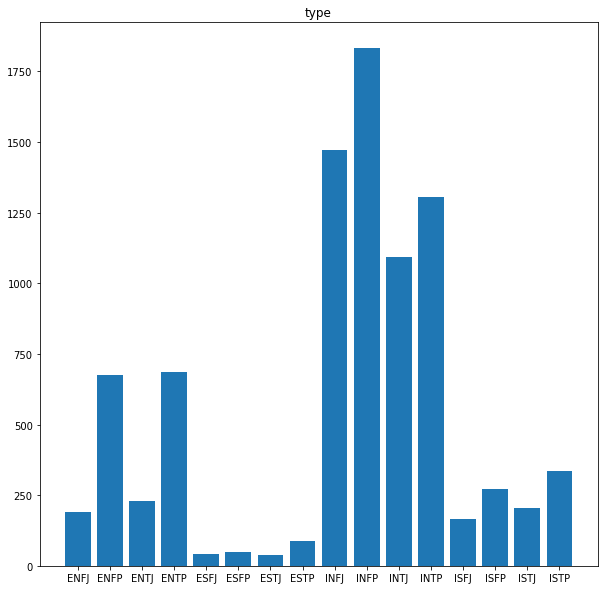

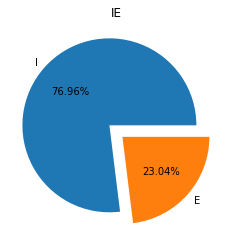

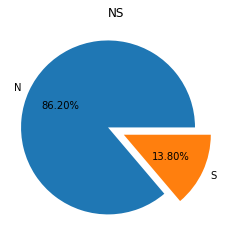

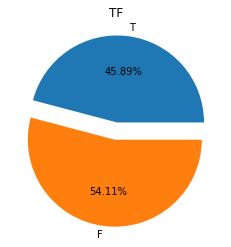

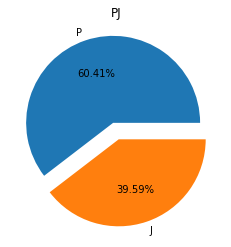

In [52]:
#sns.barplot(x="type",y="count",data=graph_data)
for column in df.columns:
  if column !='posts':
    type_new=df.groupby(column).count()
    if column=="type":
     
      plt.figure(figsize=(10, 10))
      plt.title(column)
      plt.bar(x=type_new.index,height=type_new['posts'])
    else:
      plt.figure()
      plt.title(column)

      plt.pie(labels=[type_new.index.name[0],type_new.index.name[1]],x=type_new['posts'],explode=(0.1, 0.1, ), autopct='%1.2f%%')

    #type_new['posts'].plot(kind="bar")

#As can be seen, the most common personality type is INFP

In [53]:
df.columns

Index(['type', 'posts', 'IE', 'NS', 'TF', 'PJ'], dtype='object')

#Removing stop words from the text

In [54]:
 #nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}


stopwords = STOP_WORDS
nlp = spacy.load('en_core_web_sm')


In [55]:
def preprocess(data):
    doc = nlp(data, disable = ['ner', 'parser'])
    lemmas = [token.lemma_ for token in doc]
    #remove stopwords 
    lemm = [lemma for lemma in lemmas
              if lemma.isalpha() and lemma not in stopwords ]
    return ' ' .join(lemm)
df['posts']=df['posts'].apply(preprocess)
df

,type,posts,IE,NS,TF,PJ
0,INFJ,intj moment sportscenter play life change expe...,0,0,1,1
1,ENTP,I find lack I post boring position example I g...,1,0,0,0
2,INTP,good course I I know blessing absolutely posit...,0,0,0,0
3,INTJ,Dear INTP I enjoy conversation day esoteric ga...,0,0,0,1
4,ENTJ,silly misconception approach logically key unl...,1,0,0,1
...,...,...,...,...,...,...
8670,ISFP,I think cat Fi dom reason website haven neo na...,0,1,1,0
8671,ENFP,thread exist someplace heck I delete I guess I...,1,0,1,0
8672,INTP,question I thing I purple pill pick win lotter...,0,0,0,0
8673,INFP,I conflict right come want child I honestly ma...,0,0,1,0


In [56]:
X=pd.DataFrame(data=df['posts'])
#X['posts']=df['posts']
X
Y=pd.DataFrame({'IE':df['IE'],'NS':df['NS'],'TF':df['TF'],'PJ':df['PJ']})
Y

,posts
0,intj moment sportscenter play life change expe...
1,I find lack I post boring position example I g...
2,good course I I know blessing absolutely posit...
3,Dear INTP I enjoy conversation day esoteric ga...
4,silly misconception approach logically key unl...
...,...
8670,I think cat Fi dom reason website haven neo na...
8671,thread exist someplace heck I delete I guess I...
8672,question I thing I purple pill pick win lotter...
8673,I conflict right come want child I honestly ma...


,IE,NS,TF,PJ
0,0,0,1,1
1,1,0,0,0
2,0,0,0,0
3,0,0,0,1
4,1,0,0,1
...,...,...,...,...
8670,0,1,1,0
8671,1,0,1,0
8672,0,0,0,0
8673,0,0,1,0


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer(max_features=7000,ngram_range=(1,3))
X['posts'][0]
featurized = cv.fit_transform(X['posts']).toarray()
X['posts']

'intj moment sportscenter play life change experience repeat PerC Experience immerse thing infj friend post facebook commit suicide day rest sorry hear distress natural relationship perfection time moment existence try figure hard time time growth wp content RED red pokemon Game Set wellbrutin thirty minute leg I mean sit desk chair weed moderation maybe try edible healthy alternative come item determine type whichever type want likely use type cognitive function whatnot leave thing moderation sims video game good note good somewhat subjective I completely promote death Sim ENFP favorite video game grow current favorite video game appear late I think confidence good cherish time solitude b c I revel inner world time I workin enjoy I time worry people entp lady complimentary personality main social outlet xbox live conversation verbally fatigue I dig thread require high backyard roast eat marshmellow backyard converse intellectual follow massage b sentence think watch movie corner Healt

0       intj moment sportscenter play life change expe...
1       I find lack I post boring position example I g...
2       good course I I know blessing absolutely posit...
3       Dear INTP I enjoy conversation day esoteric ga...
4       silly misconception approach logically key unl...
                              ...                        
8670    I think cat Fi dom reason website haven neo na...
8671    thread exist someplace heck I delete I guess I...
8672    question I thing I purple pill pick win lotter...
8673    I conflict right come want child I honestly ma...
8674    long I personalitycafe change bit I good like ...
Name: posts, Length: 8675, dtype: object

In [59]:
featurized.shape

(8675, 7000)

In [60]:
print((cv.get_feature_names()))

['abandon', 'ability', 'able', 'able find', 'abnormal', 'abortion', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutely hate', 'absolutely love', 'absorb', 'abstract', 'absurd', 'abuse', 'abusive', 'academic', 'accent', 'accept', 'acceptable', 'acceptance', 'access', 'accident', 'accidentally', 'accompany', 'accomplish', 'accomplishment', 'accord', 'account', 'accuracy', 'accurate', 'accurately', 'accuse', 'ace', 'achieve', 'achievement', 'acid', 'acknowledge', 'acquaintance', 'acquire', 'act', 'act like', 'act way', 'action', 'active', 'actively', 'activity', 'actor', 'actress', 'actual', 'actually', 'actually care', 'actually enjoy', 'actually feel', 'actually find', 'actually good', 'actually kind', 'actually know', 'actually like', 'actually look', 'actually lot', 'actually love', 'actually mean', 'actually pretty', 'actually read', 'actually start', 'actually talk', 'actually think', 'actually try', 'actually use', 'actually want', 'actually work', 'ad', 'adam', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [61]:
#featurized = featurized[:, featurized.sum(axis=1) >= 2]
print(featurized)
featurized=pd.DataFrame(data=featurized,columns=cv.get_feature_names())
#featurized=featurized[featurized.columns[featurized.sum()>0.2]]
featurized

[[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 2 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,abandon,ability,able,able find,abnormal,abortion,abroad,absence,absent,absolute,...,youtube,youtube video,yr,yup,zelda,zen,zero,zodiac,zombie,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8673,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting training and testing data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(featurized, Y, test_size=0.3,random_state=1)
#print(X_train,y_train)


In [64]:
y_IE=y_train['IE']

In [65]:
from sklearn.metrics import plot_confusion_matrix


# Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB


GaussianNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



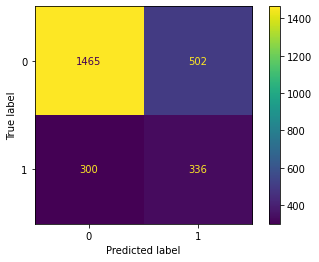

0.6918939684978871


In [67]:
Gaussian_IE = GaussianNB()
Gaussian_IE.fit(X_train, y_train['IE'])
# y_pred_log = Gaussian.predict(X_test)
# y_pred_log1 = Gaussian.predict_proba(X_test)
plot_confusion_matrix(Gaussian_IE, X_test, y_test['IE'])  
plt.show()
print(Gaussian_IE.score(X_test,y_test['IE']))


In [68]:
from sklearn.naive_bayes import MultinomialNB


MultinomialNB(alpha=1e-08)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



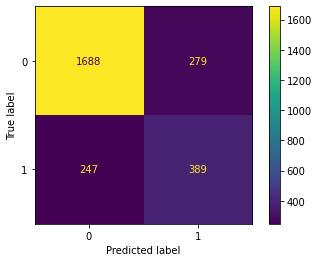

0.7979254706108336


In [69]:
clf = MultinomialNB(alpha=1e-8)
clf.fit(X_train, y_train['IE'])
plot_confusion_matrix(clf, X_test, y_test['IE'])  
plt.show()
print(clf.score(X_test,y_test['IE']))

MultinomialNB(alpha=1e-08)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



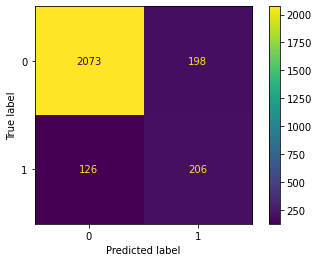

0.8755282366500192


In [70]:
clfNS = MultinomialNB(alpha=1e-8)
clfNS.fit(X_train, y_train['NS'])
plot_confusion_matrix(clfNS, X_test, y_test['NS'])  
plt.show()
print(clfNS.score(X_test,y_test['NS']))

MultinomialNB(alpha=1e-08)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



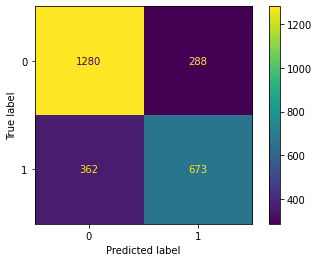

0.7502881290818286


In [71]:
clfPJ = MultinomialNB(alpha=1e-8)
clfPJ.fit(X_train, y_train['PJ'])
plot_confusion_matrix(clfPJ, X_test, y_test['PJ'])  
plt.show()
print(clfPJ.score(X_test,y_test['PJ']))

MultinomialNB(alpha=1e-08)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



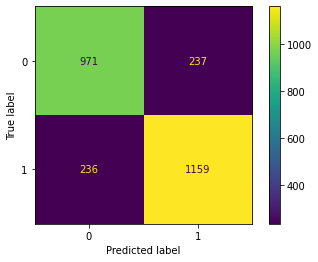

0.8182865923933922


In [72]:
clfTF = MultinomialNB(alpha=1e-8)
clfTF.fit(X_train, y_train['TF'])
plot_confusion_matrix(clfTF, X_test, y_test['TF'])  
plt.show()
print(clfTF.score(X_test,y_test['TF']))

In [73]:
from sklearn.linear_model import PassiveAggressiveClassifier

PassiveAggressiveClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



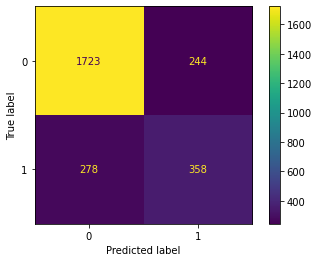

0.7994621590472532


In [74]:
pas_IE = PassiveAggressiveClassifier(max_iter=1000)
pas_IE.fit(X_train, y_train['IE'])
plot_confusion_matrix(pas_IE, X_test, y_test['IE'])  
plt.show()
print(pas_IE.score(X_test,y_test['IE']))